## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Question 1
# Read the mosquitos dataset
df = pd.read_csv('mosquitos_data.csv')

# Separate the data into beer and water categories
beer_data = df.loc[df["Treatment"] == "Beer"]
beer_data = beer_data['Response']
water_data = df.loc[df["Treatment"] == "Water"]
water_data = water_data['Response']

Text(0, 0.5, '# of mosquitos')

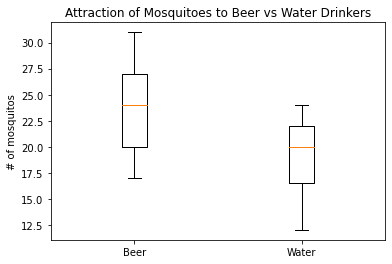

In [84]:
# Combine into 1 dataframe

plot_data = [beer_data, water_data]


# Plot boxplots of number of mosquitos for beer and water data
plt.boxplot(plot_data, labels=['Beer','Water'])
plt.title('Attraction of Mosquitoes to Beer vs Water Drinkers')
plt.ylabel('# of mosquitos')

The graph reveals that those who drank beer were more likely to attract mosquitoes than those who drank water.
It also shows that people will still attract mosquitoes regardless if you drink beer or water.
There is an association between beer drinking and mosquito attraction.


In [67]:
# Beer Statistic Measures
print('Mean: ', beer_data.mean())
print('Median:', beer_data.median())
print('Standard Deviation: ', round(beer_data.std(),2))

Mean:  23.6
Median: 24.0
Standard Deviation:  4.13


In [70]:
# Water Statistic Measures
print('Mean: ', round(water_data.mean(),1))
print('Median:', water_data.median())
print('Standard Deviation: ', round(water_data.std(),2))

Mean:  19.2
Median: 20.0
Standard Deviation:  3.67


For the given dataset, the median number of mosquitoes attracted 24 mosquitos for beer and 20 for water. 
This means the middle value of the list of beer drinkers had 4 more mosquitos than that of water drinkers.
Also, the average number of mosquitoes attracted was 23.6 and 19.2 for beer and water drinkers, respectively.
This shows how beer drinkers on average attracted more mosquitoes.
Standard deviation is a measure of spread of the data. It is clear that beer drinkers had more dispersed attractions to mosquitoes than water drinkers.


In [154]:
# Question 2
# Combine all the data into a single dataframe
conc_data = np.append(beer_data,water_data)

# Loop the following for 10,000 iterations
# Count each time the mean difference is >= 4.4

count = 0
experiments = 10000
for i in range(experiments):
    np.random.shuffle(conc_data)

    # Split the shuffled sample into a group of 25 and 18 (group a and b, respectively)
    group_a = conc_data[0:25]
    group_a_mean = group_a.mean()

    group_b = conc_data[25:]
    group_b_mean = group_b.mean()

    # Get the mean difference from group a to group b
    mean_diff = group_a_mean - group_b_mean
    if mean_diff >= 4.4:
        count += 1
        
# Calculate the probability that the mean difference is >= 4.4

print('The probability that the mean difference is >= 4.4 is', count/experiments)

The probability that the mean difference is >= 4.4 is 0.0003
